In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
import sys
sys.path.append("eval/plotting")
from plotting import ridge_plot

In [72]:
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
def models_eval_dict_to_dataframe(models_eval_dict):
    """Convert a dictionary of model evaluations to a dataframe"""
    model_dataframes = []
    for model_name, seed_files in models_eval_dict.items():
        seed_dataframes = []
        for seed_id, seed_eval_file in enumerate(seed_files):
            with open(os.path.join(save_eval_result_dir, seed_eval_file), 'r') as json_file:
                data = json.load(json_file)
                data = pd.DataFrame(data)
                seed_dataframes.append(data)
        seed_eval_df = pd.concat(seed_dataframes)
        seed_eval_df['models'] = model_name
        model_dataframes.append(seed_eval_df)
    model_dfs = pd.concat(model_dataframes)
    model_dfs = model_dfs.reset_index()
    return(model_dfs)


# Comapre Results on Seen vs. Unseen for each model
- 3 agents unseen


Text(0.5, 1.0, '3-robots, unseen coalitions')

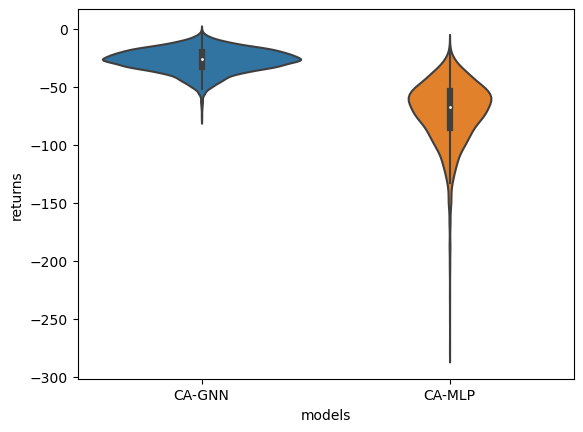

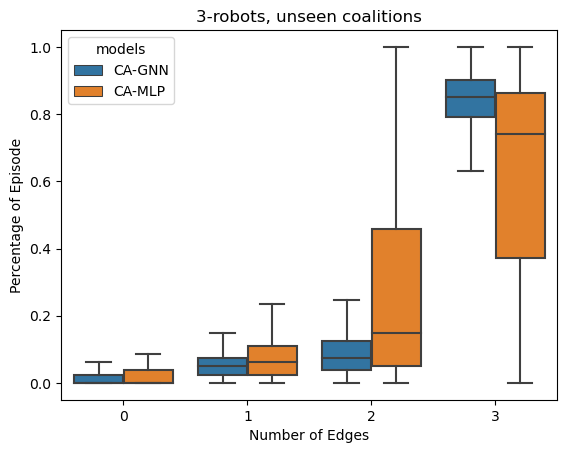

In [82]:
# Eval 1
save_eval_result_dir = "/home/dwalkerhowell3/star_lab/experiments_ca-gnn-marl/eval_saves"
models_eval_dict = {
    "CA-GNN": [
        "eval_3_agents_unseen_SC_4_agents_HSN_sacred_run_1.json",
        "eval_3_agents_unseen_SC_4_agents_HSN_sacred_run_2.json",
        "eval_3_agents_unseen_SC_4_agents_HSN_sacred_run_3.json"
    ],
    "CA-MLP": [
        "eval_3_agents_unseen_MLP_4_agents_HSN_sacred_run_1.json",
        "eval_3_agents_unseen_MLP_4_agents_HSN_sacred_run_2.json",
        "eval_3_agents_unseen_MLP_4_agents_HSN_sacred_run_3.json"
    ],
}

evals_df = models_eval_dict_to_dataframe(models_eval_dict)

sns.violinplot(data=evals_df, x="models", y='returns')
plt.title("3-robots, unseen coalitions")
plt.figure()

n = evals_df.shape[1]
df_exploded = evals_df.explode('connectivity', ignore_index=False)
df_exploded["Index"] = df_exploded.groupby(df_exploded.index).cumcount()

sns.boxplot(data=df_exploded, x="Index", y="connectivity", hue="models", showfliers=False)
plt.ylabel("Percentage of Episode")
plt.xlabel("Number of Edges")
plt.title("3-robots, unseen coalitions")
